In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.pandas.set_option("display.max_columns", None)

In [6]:
dataset = pd.read_csv("creditcard.csv")
dataset.shape

(284807, 31)

In [13]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
values = pd.value_counts(dataset["Class"], sort = True)
values

0    284315
1       492
Name: Class, dtype: int64

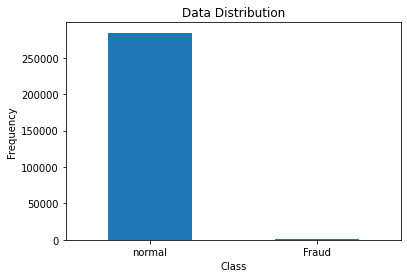

In [11]:
from matplotlib.pyplot import xticks


values.plot(kind = "bar", rot = 0)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Data Distribution")
xticks(range(2), ["normal", "Fraud"])
plt.show()

#### we can balance the data by two methods 
#### 1. Under Sampling
#### 2. Over Sampling 

##### Balancing the data with under sampling 

In [16]:
columns = [i for i in dataset.columns if i not in ["Class"]]
len(columns)

30

In [17]:
x = dataset[columns]
y = dataset["Class"]

In [21]:
from imblearn.under_sampling import NearMiss

object_for_under_sampling = NearMiss()
X_for_under_sampling , Y_for_under_sampling = object_for_under_sampling.fit_resample(x, y)


In [22]:
print(X_for_under_sampling.shape, Y_for_under_sampling.shape)

(984, 30) (984,)


##### Balancing the data with Over Sampling 

In [23]:
from imblearn.over_sampling import RandomOverSampler

object_for_over_sampling = RandomOverSampler()
X_for_over_sampling, Y_for_over_sampling = object_for_over_sampling.fit_resample(x, y)


In [25]:
print(X_for_over_sampling.shape, Y_for_over_sampling.shape)

(568630, 30) (568630,)


In [26]:
a = pd.value_counts(Y_for_over_sampling, sort = True)
a

0    284315
1    284315
Name: Class, dtype: int64